In [13]:
# Import Library

# data preparation
import urllib.request
import zipfile
import os

# image augmentation and processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# image visualization
import matplotlib.pyplot as plt

# modelling
import tensorflow as tf
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download dataset
data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
local_file = 'cats_and_dogs.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [6]:
BASE_DIR = 'cats_and_dogs_filtered'
train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

In [7]:
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
)

train_generator =  train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=16
)

valid_datagen =  ImageDataGenerator(
    rescale=1./255
)

valid_generator =  valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=16
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


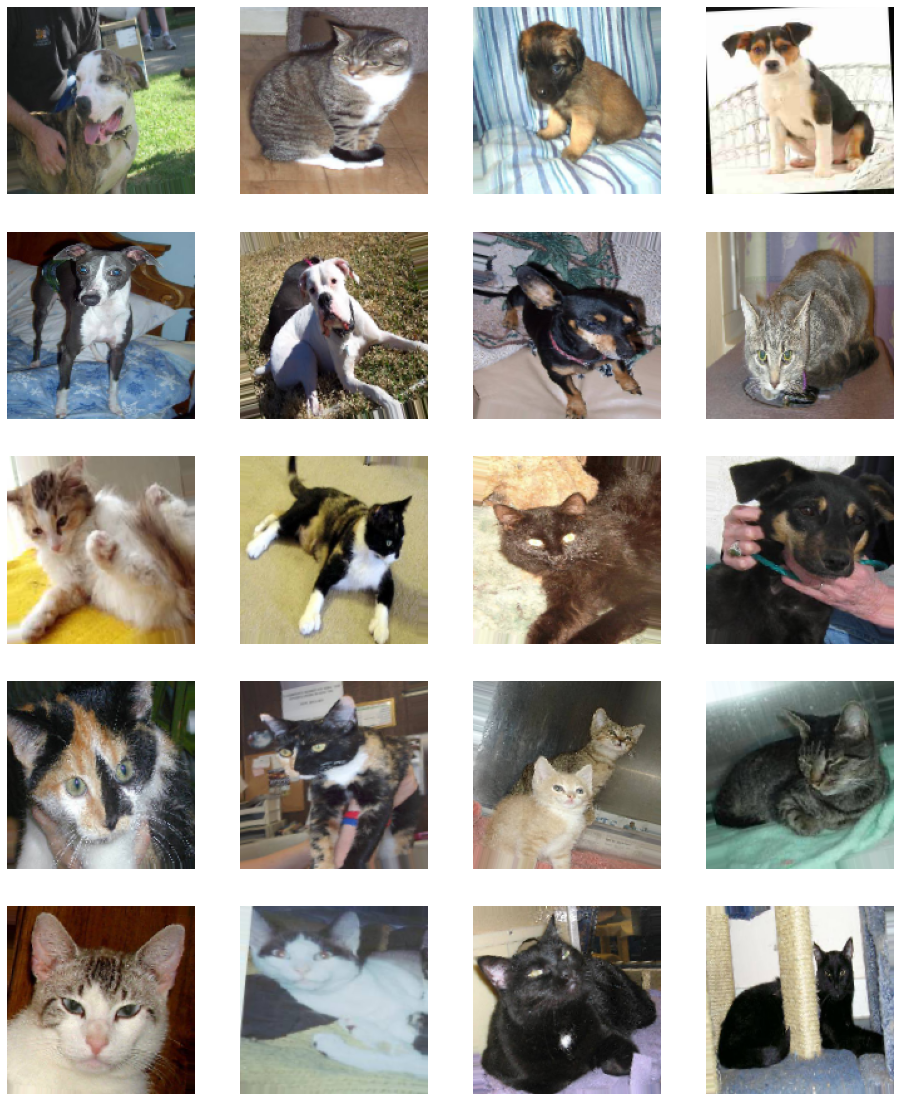

In [9]:
plt.figure(figsize=(16, 20))

for i in range(20):
    img, label = train_generator.next()
    plt.subplot(5, 4, i+1)
    plt.imshow(img[0])
    plt.axis('off')
    
plt.show()

In [10]:
varians_dict = train_generator.class_indices
print(varians_dict)

{'cats': 0, 'dogs': 1}


In [22]:
clear_session()

model1 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding="same",input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [23]:
model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
    
history1 = model1.fit(train_generator,
            validation_data=valid_generator,
            epochs=30)

Epoch 1/30
125/125 [==============================] - 18s 134ms/step - loss: 0.6931 - acc: 0.5115 - val_loss: 0.6930 - val_acc: 0.5020
Epoch 2/30
125/125 [==============================] - 16s 125ms/step - loss: 0.6927 - acc: 0.5130 - val_loss: 0.6925 - val_acc: 0.5020
Epoch 3/30
125/125 [==============================] - 15s 124ms/step - loss: 0.6955 - acc: 0.5235 - val_loss: 0.6866 - val_acc: 0.5870
Epoch 4/30
125/125 [==============================] - 16s 126ms/step - loss: 0.6800 - acc: 0.5815 - val_loss: 0.6608 - val_acc: 0.6090
Epoch 5/30
125/125 [==============================] - 16s 124ms/step - loss: 0.6607 - acc: 0.6105 - val_loss: 0.6396 - val_acc: 0.6360
Epoch 6/30
125/125 [==============================] - 15s 122ms/step - loss: 0.6340 - acc: 0.6440 - val_loss: 0.6398 - val_acc: 0.6250
Epoch 7/30
125/125 [==============================] - 15s 122ms/step - loss: 0.6327 - acc: 0.6490 - val_loss: 0.6328 - val_acc: 0.6480
Epoch 8/30
125/125 [==============================] - 1

In [30]:
model2 = Sequential([
    Conv2D(64, (3,3), activation='relu', padding="same",input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 18, 18, 128)     

In [31]:
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
    
history2 = model2.fit(train_generator,
            validation_data=valid_generator,
            epochs=30)

Epoch 1/30
125/125 [==============================] - 17s 126ms/step - loss: 0.6949 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/30
125/125 [==============================] - 16s 128ms/step - loss: 0.6940 - acc: 0.5000 - val_loss: 0.6923 - val_acc: 0.5320
Epoch 3/30
125/125 [==============================] - 15s 124ms/step - loss: 0.6931 - acc: 0.4920 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 4/30
125/125 [==============================] - 16s 125ms/step - loss: 0.6939 - acc: 0.5055 - val_loss: 0.6785 - val_acc: 0.6060
Epoch 5/30
125/125 [==============================] - 15s 123ms/step - loss: 0.6943 - acc: 0.5115 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/30
125/125 [==============================] - 16s 130ms/step - loss: 0.6931 - acc: 0.5140 - val_loss: 0.6916 - val_acc: 0.5180
Epoch 7/30
125/125 [==============================] - 15s 121ms/step - loss: 0.6919 - acc: 0.5270 - val_loss: 0.6901 - val_acc: 0.5440
Epoch 8/30
125/125 [==============================] - 1

KeyboardInterrupt: 

In [ ]:
model3 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding="same",input_shape=(150,150,3)),
    Conv2D(32, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding="same"),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding="same"),
    Conv2D(256, (3,3), activation='relu', padding="same"),
    MaxPool2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model3.summary()

In [ ]:
model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
    
history3 = model3.fit(train_generator,
            validation_data=valid_generator,
            epochs=30)

In [ ]:
train_acc = history1.history['acc']
train_loss = history1.history['loss']
val_acc = history1.history['val_acc']
val_loss = history1.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
train_acc = history2.history['acc']
train_loss = history2.history['loss']
val_acc = history2.history['val_acc']
val_loss = history2.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
train_acc = history3.history['acc']
train_loss = history3.history['loss']
val_acc = history3.history['val_acc']
val_loss = history3.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
for varian in varians_dict.keys():
    images_list = os.listdir(os.path.join(validation_dir, varian))    
#    plt.figure(figsize=(16, 20))

    correct_count = 0

    for idx, image in enumerate(images_list):
        img_path = f'/cats_and_dogs_filtered/validation/{varian}/{image}'
        img = load_img(img_path, target_size=(150,150))

        img_array = img_to_array(img)
        img_array = img_array/255.
        img_array = tf.expand_dims(img_array, 0)

        varians_list = list(varians_dict.keys())
        prediction = model(img_array)
        #pred_idx = np.argmax(prediction)
        pred_idx = np.round(model.predict(img_array)[0][0]).astype('int')
        pred_varian = varians_list[pred_idx]
        pred_confidence = prediction[0][pred_idx] * 100

        if pred_varian == varian:
            correct_count += 1

        #plt.subplot(20, 10, idx+1)
        #plt.title(f'Actual: {varian}\nPrediction: {pred_varian} {pred_confidence:.2f}%')
        #plt.imshow(img)
        #plt.axis('off')
    
    print(f'{varian} Predictions --> {correct_count}/200 correct')
#plt.show()

In [ ]:
model1.save("model1.h5")
model2.save("model1.h5")
model3.save("model1.h5")